In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import pdb
from tqdm import tqdm
import pickle
import sys
from matplotlib import pyplot as plt
import h5py
from pynwb import NWBHDF5IO

In [5]:
f = h5py.File('/home/akumar/nse/neural_control/indy_20160630_01.nwb','r')

In [16]:
t = f['acquisition']['timeseries']['broadband']['timestamps'][:]

In [4]:
# Load the raw broadband data
io = NWBHDF5IO('/home/akumar/nse/neural_control/indy_20160630_01.nwb', 'r')
nwbfile = io.read()

ValueError: No data_type found for builder root

In [3]:
sys.path.append('/home/akumar/nse/neural_control')

In [4]:
from loaders import load_sabes_wf, load_sabes

In [5]:
f = h5py.File('/home/akumar/nse/neural_control/data/indy_20160624_03.mat', 'r')

In [4]:
f.keys()

<KeysViewHDF5 ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']>

In [6]:
f['spikes']

<HDF5 dataset "spikes": shape (5, 96), type "|O">

In [5]:
f['wf']

<HDF5 dataset "wf": shape (5, 96), type "|O">

In [7]:
n_channels = f['chan_names'].shape[1]
chan_names = []
for i in range(n_channels):
    chan_names.append(f[f['chan_names'][0, i]][()].tobytes()[::2].decode())

In [8]:
M1_indices = [i for i in range(n_channels) if chan_names[i].split(' ')[0] == 'M1']

In [12]:
n_units = n_channels * (f['spikes'].shape[0] - 1)

In [20]:
f[f['spikes'][0, 0]]

<HDF5 dataset "Jb": shape (1, 2806), type "<f8">

In [21]:
wf = f[f['wf'][0, 0]][()]

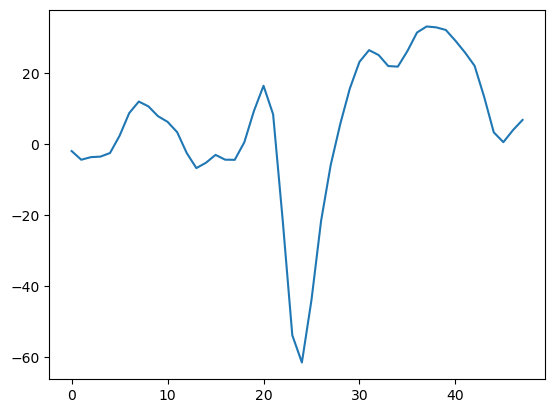

In [25]:
plt.plot(wf[:, 1])

In [23]:
wf = load_sabes_wf('/home/akumar/nse/neural_control/data/indy_20160624_03.mat')

In [13]:
dat = load_sabes('/home/akumar/nse/neural_control/data/indy_20160624_03.mat')

In [14]:
dat['spike_rates'].shape

(1, 9998, 149)

In [25]:
wf[0].shape

(171, 48)

In [ ]:
# Feature construction
# (1) Trough to peak duration (global minimum to local maximum subsequently)
# (2) Repolarization time (time between late peak and inflection point of the curve)

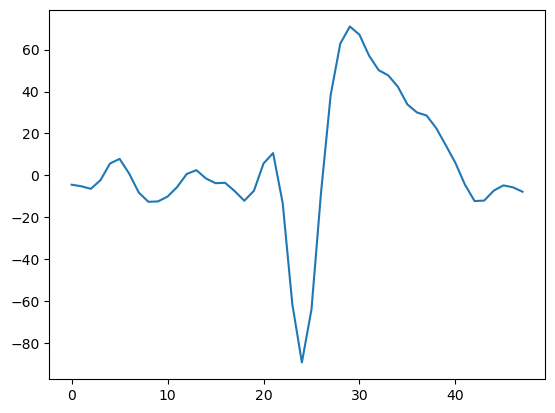

In [39]:
plt.plot(wf[10][3, :])

In [ ]:
def extract_wf_features(wf):

    # Global minima
    gmin = np.argmin(wf)
    scipy.signal.find_peaks(wf, )       